In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

Training data:

In [38]:
zi16 = np.array([
    (-1, 25.9), (15, -49265547079055.47), (-7, -30424404805.77), (18, -553103209741255.44),
    (-5, -648646422.1), (-19, -3284776520002618), (3, 1357175.22), (-13, -38415289974254.68),
    (12, -2007790595493.53), (8, 12593837766.07), (-10, -1881548479395.43),
    (16, -115944338034315.36), (-9, -569934408720.23), (-12, -14653824769100.51),
    (-8, -144145194035), (0, -3.96), (7, 5212672510.07), (17, -258761221977323.53),
    (-2, -16961.68), (1, 1), (-6, -5084478838.49), (6, 1372953117.69),
    (13, -6593494472551.21), (20, -2270954707849741.5), (9, 14779195041.49),
    (-17, -907869332487665.5)
])

In [39]:
X = zi16[:, 0].reshape(-1, 1)  # Input Properties
y = zi16[:, 1]  # Output Values

Create a 12th degree polynomial model with Ridge Regression:

In [40]:
degree = 12
ridge_reg = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1e-5))
ridge_reg.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.70522e-37): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=12)),
                ('ridge', Ridge(alpha=1e-05))])

Create forecast data to plot:

In [41]:
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_plot = ridge_reg.predict(X_plot)


Diagram:

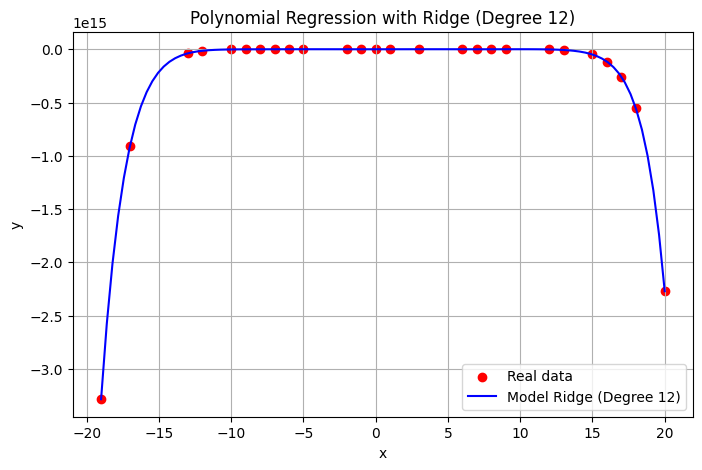

In [42]:
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='red', label='Real data')
plt.plot(X_plot, y_plot, color='blue', label='Model Ridge (Degree 12)')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial Regression with Ridge (Degree 12)")
plt.legend()
plt.grid()
plt.savefig('plot.png') # Saving first Diagram
plt.show()


New value for alpha:

In [43]:
new_alpha = 1e-1 #Higher value to avoid overfitting

New Ridge model with higher alpha value:

In [44]:
ridge_reg_new = make_pipeline(PolynomialFeatures(3), Ridge(alpha=new_alpha))
ridge_reg_new.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('ridge', Ridge(alpha=0.1))])

Prediction with new Model:

In [45]:
y_plot_new = ridge_reg_new.predict(X_plot)

Diagram_new:

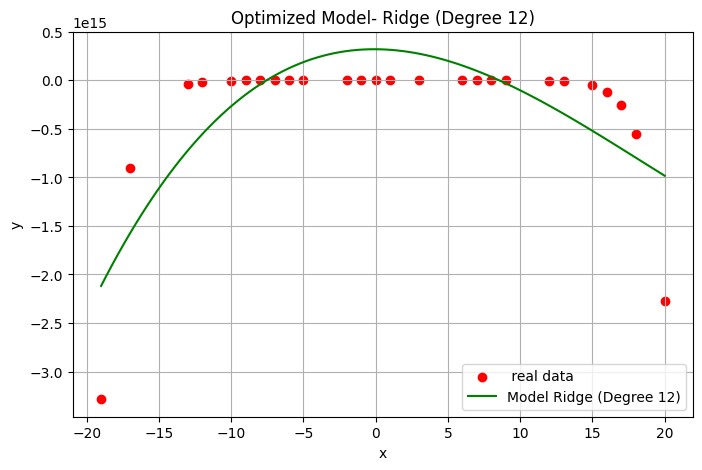

In [46]:
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='red', label=' real data')
plt.plot(X_plot, y_plot_new, color='green', label='Model Ridge (Degree 12)')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Optimized Model- Ridge (Degree 12)")
plt.legend()
plt.grid()
plt.savefig("ridge_alpha_le-5.png")  # saving new Model
plt.show()

In [47]:
globals().keys()

dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', '_', '__', '___', '_i', '_ii', '_iii', '_i1', 'np', 'plt', 'PolynomialFeatures', 'Ridge', 'make_pipeline', '_i2', 'zi16', '_i3', 'X', 'y', '_i4', 'degree', 'ridge_reg', '_4', '_i5', 'X_plot', 'y_plot', '_i6', '_i7', 'new_alpha', '_i8', 'ridge_reg_new', '_8', '_i9', 'y_plot_new', '_i10', '_i11', '_11', '_i12', '_i13', '_i14', '_i15', '_i16', '_16', '_i17', '_i18', '_i19', '_i20', '_20', '_i21', '_i22', '_i23', '_23', '_i24', '_i25', '_i26', '_i27', '_i28', '_28', '_i29', '_i30', '_i31', '_i32', '_32', '_i33', '_i34', '_i35', '_35', '_i36', '_i37', '_i38', '_i39', '_i40', '_40', '_i41', '_i42', '_i43', '_i44', '_44', '_i45', '_i46', '_i47'])

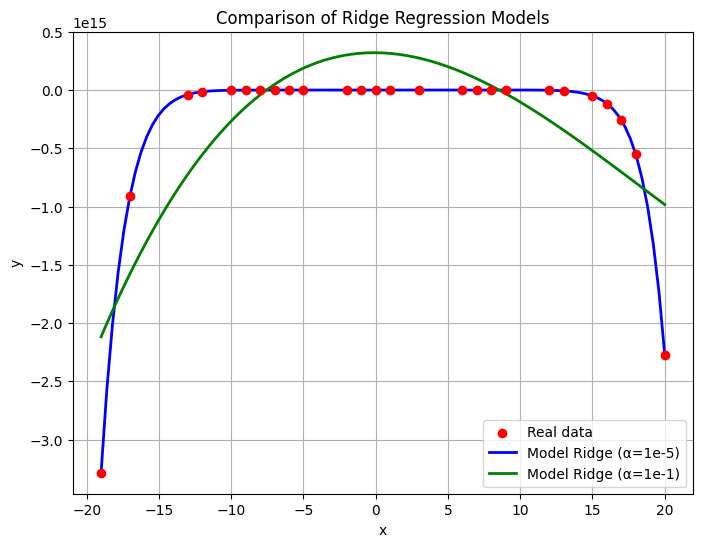

In [48]:
plt.figure(figsize=(8, 6))

# real data
plt.scatter(X, y, color='red', label="Real data", zorder=3)

# first Model : Ridge(alpha=1e-5)
plt.plot(X_plot, y_plot, color='blue', label="Model Ridge (α=1e-5)", linewidth=2)

# second Model: Ridge(alpha=1e-1)
plt.plot(X_plot, y_plot_new, color='green', label="Model Ridge (α=1e-1)", linewidth=2)

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Comparison of Ridge Regression Models")
plt.grid()
plt.show()

# The degree of the polynomial significantly affects the model's shape,
# while the alpha parameter has little impact in this case.
